In [ ]:
# cuestomer segmetation - K-means clustering

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans

from sklearn import metrics


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.shape

(200, 5)

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
X=df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values # df.iloc[:,3:]

In [64]:
X.shape # lista de valores

(200, 2)

In [66]:
# elegimos el numero de clusters - WCSS

In [68]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

  File "C:\Users\david\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\david\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\david\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\david\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Text(0, 0.5, 'WCSS')

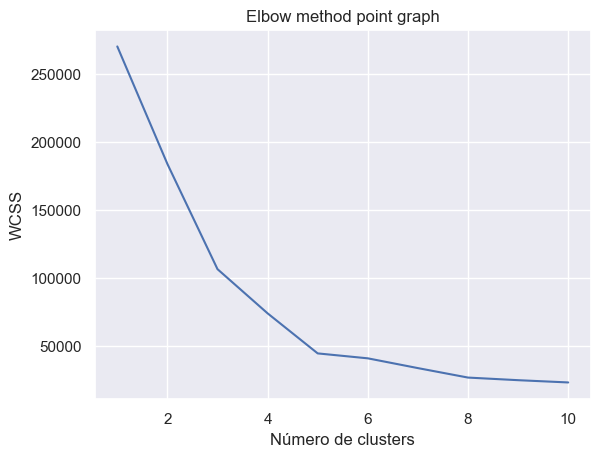

In [74]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow method point graph')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
# observamos con el gráfico como el número adecuado de clusters es 5.

In [76]:
# entrenamos k_Means clustering model

In [78]:
kmeans=KMeans(n_clusters=5,init='k-means++', random_state=0)

In [82]:
# devolvemos un label para cada punto basado en el cluster
y=kmeans.fit_predict(X)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Text(0, 0.5, 'Spending Score')

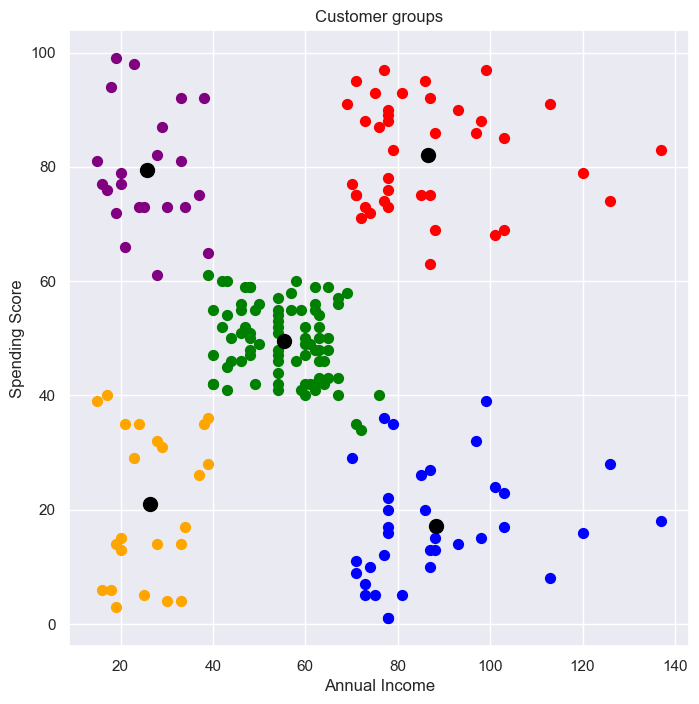

In [94]:
# plot clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='orange',label='Cluster 4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='purple',label='Cluster 5')
# X[y==N, 0]: Selecciona todas las filas de X donde la etiqueta y es igual a N, y toma la columna 0 (primer feature/eje X).

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100 , c='black',label='Centroids')

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')